In [1]:
import numpy as np 
from scipy.constants import find, physical_constants, c
import matplotlib.pyplot as plt
import import_ipynb
import phase_screen_model_classes as ps

In [2]:
def compute_k(wavelength):
    return 2 * np.pi / wavelength

In [3]:
class PlotResults:
    
    def __init__(self, phase_screen_dec, e_theoretical, phase_screen_cyl):
        self.phase_screen_dec = phase_screen_dec
        self.e_theoretical = e_theoretical
        self.phase_screen_cyl = phase_screen_cyl
        
    
   
    def plot_results(self, wavelength, z_divide_lambda):
        numerical_results = self.phase_screen_dec.generation_of_phase_screen_dec()
        I_theory = self.e_theoretical.calculate_E_theoretical()
        cyl_results = self.phase_screen_cyl.generation_of_phase_screen_cyl()
        
        plt.rcParams.update({'font.size': 12})
        fig, axs = plt.subplots(
            len(z_divide_lambda), 1, figsize=(8, 28) )
        #     , constrained_layout=True
        # )
        # fig.suptitle(f"dx = {self.phase_screen_dec.dx}", fontsize=15)
        fig.subplots_adjust(hspace = 0.6)
        for i, (zi, num_intensity, th_intensity, cyl_intensity) in enumerate(
            zip(z_divide_lambda, numerical_results, I_theory, cyl_results)
        ):
            axs[i].plot(
                self.phase_screen_dec.x /wavelength,
                th_intensity,
                label="Theoretical",
                linewidth=4,
            )
            axs[i].plot(
                self.e_theoretical.x /wavelength,
                num_intensity,
                label="Cartesian",
                linewidth=4,
                linestyle="--",
            )
            axs[i].plot(
                self.phase_screen_cyl.theta * self.phase_screen_cyl.R /wavelength,
                cyl_intensity,
                label="Cylindrical",
                linewidth=4,
                linestyle="dotted",
            )
            axs[i].set_title(f"z / λ = {zi}")
            axs[i].set_xlabel("Distance (x / λ)")
            axs[i].set_ylabel("Intensity |E|^2")
            axs[i].legend()
            axs[i].grid()
            axs[i].set_ylim([0, 8])
        
        # plt.tight_layout()    
        plt.savefig(f"C:\\GitHub\\master_diploma\\figures\\dx={self.phase_screen_dec.dx}_NEW3.0GraphsForReview.png", dpi='figure')
        plt.show()


In [4]:
# Constants

#both cartesian and cylindrical
freq = 1e9
wavelength = c / freq
k = compute_k(wavelength)
phi0 = 10  # phi0 in radians
r0 = wavelength
L = 6  # Length of the observation grid
grid_size = 30000
#Here z_values = z2-z1, where z1 = 0, z2 = z1 + dz = 0 + z_values 
z_divide_lambda =  np.concatenate((np.array([0.5]) , np.linspace(2, 10, 2)))
z_values = z_divide_lambda*wavelength


#cylindrical only
R = 100  # 100 meters to source (it is radius of circle)
Grid_theta = 0.06  # radians
r = 100
dr_values = z_divide_lambda*wavelength
grid_sizes = np.linspace(5000, 150000, 6 ,dtype='int')

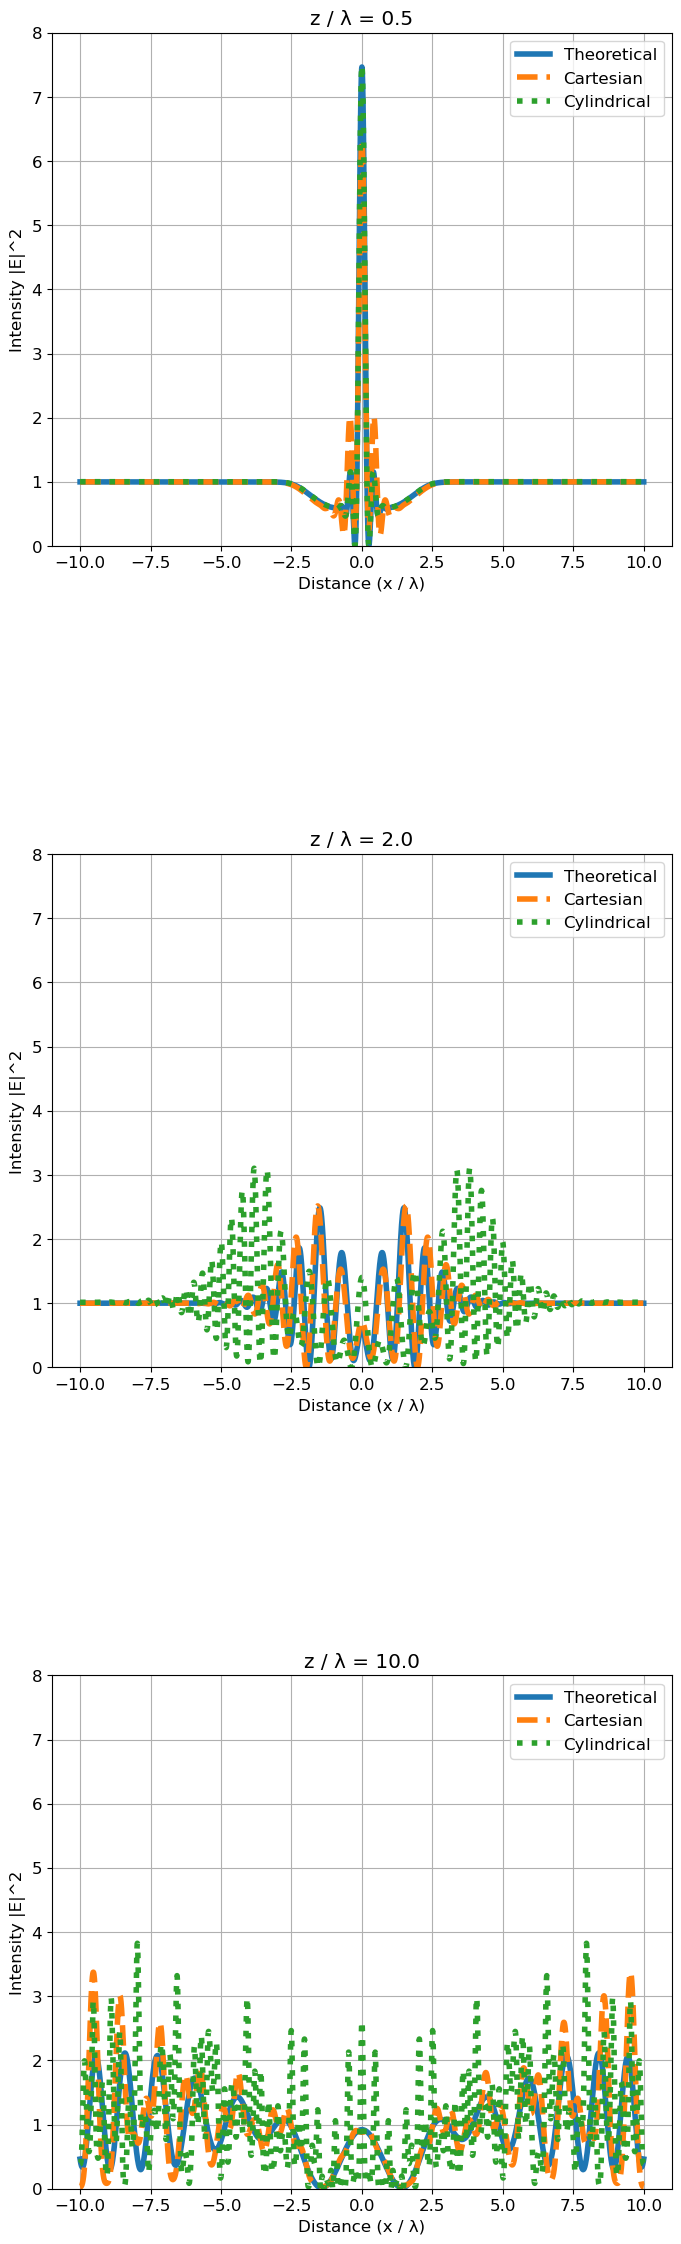

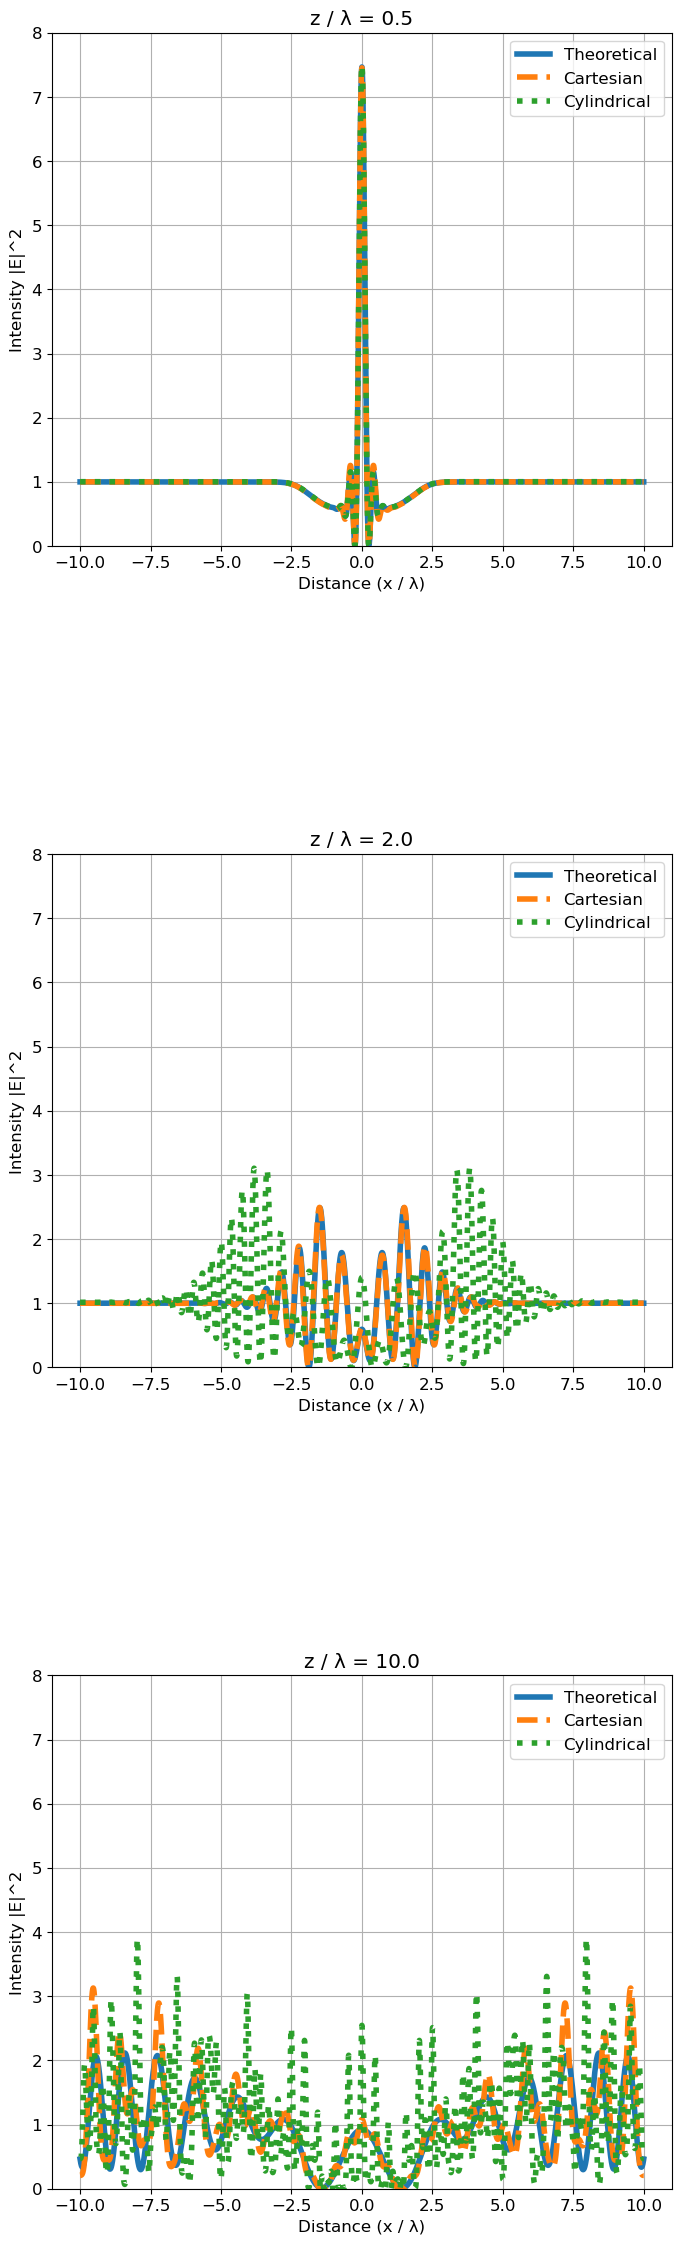

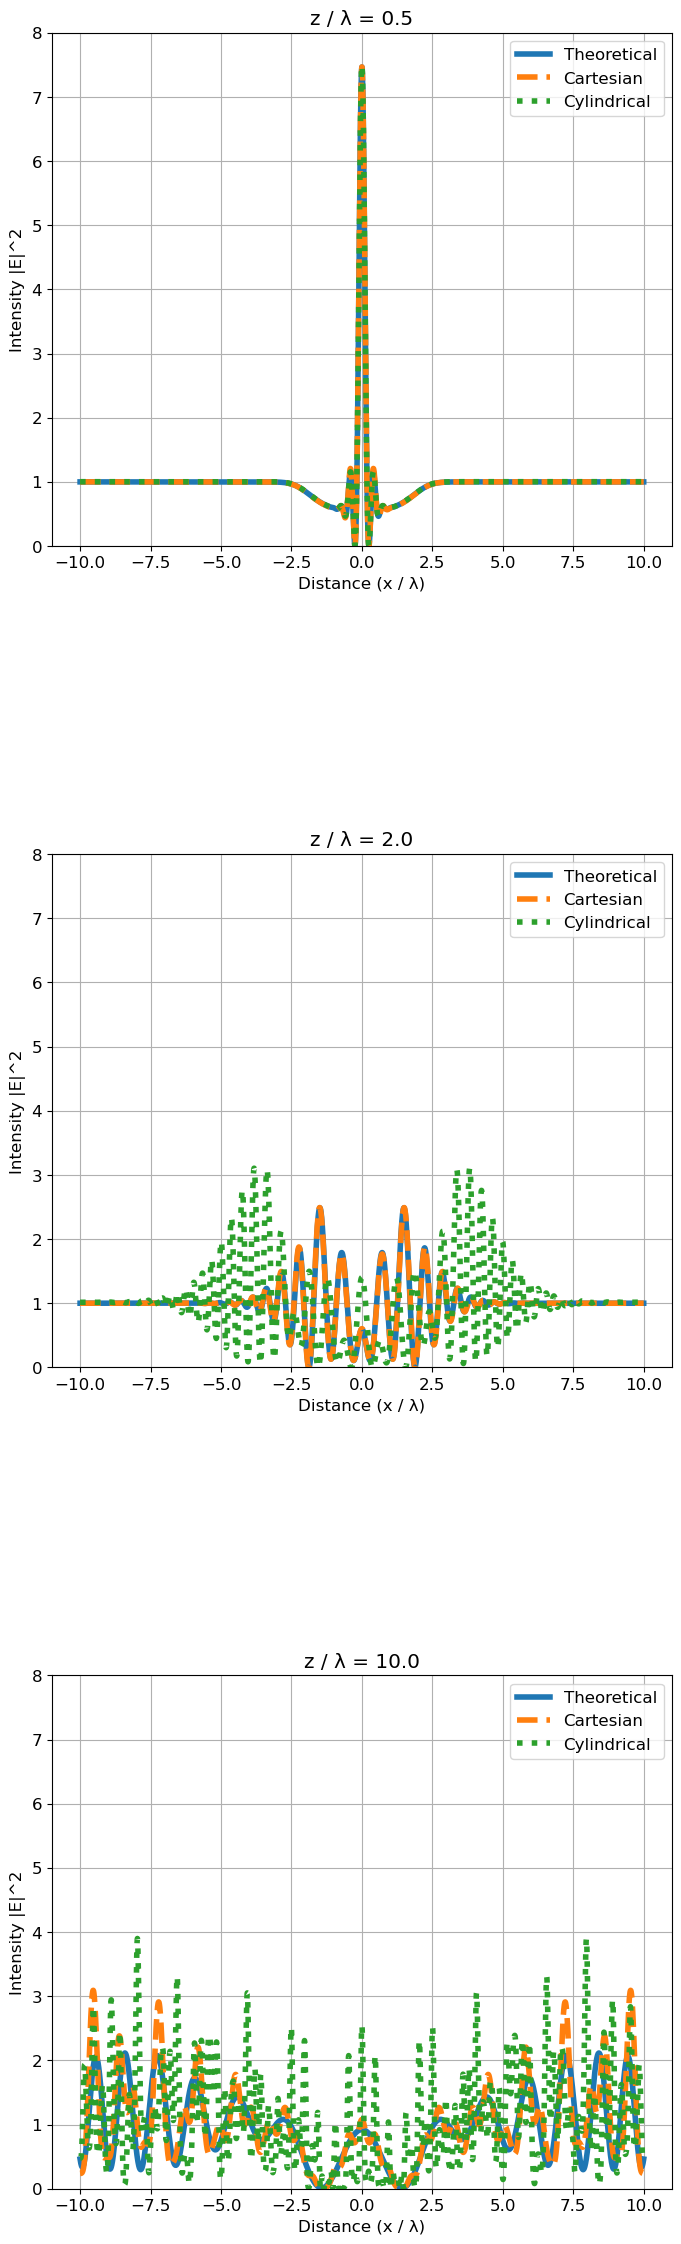

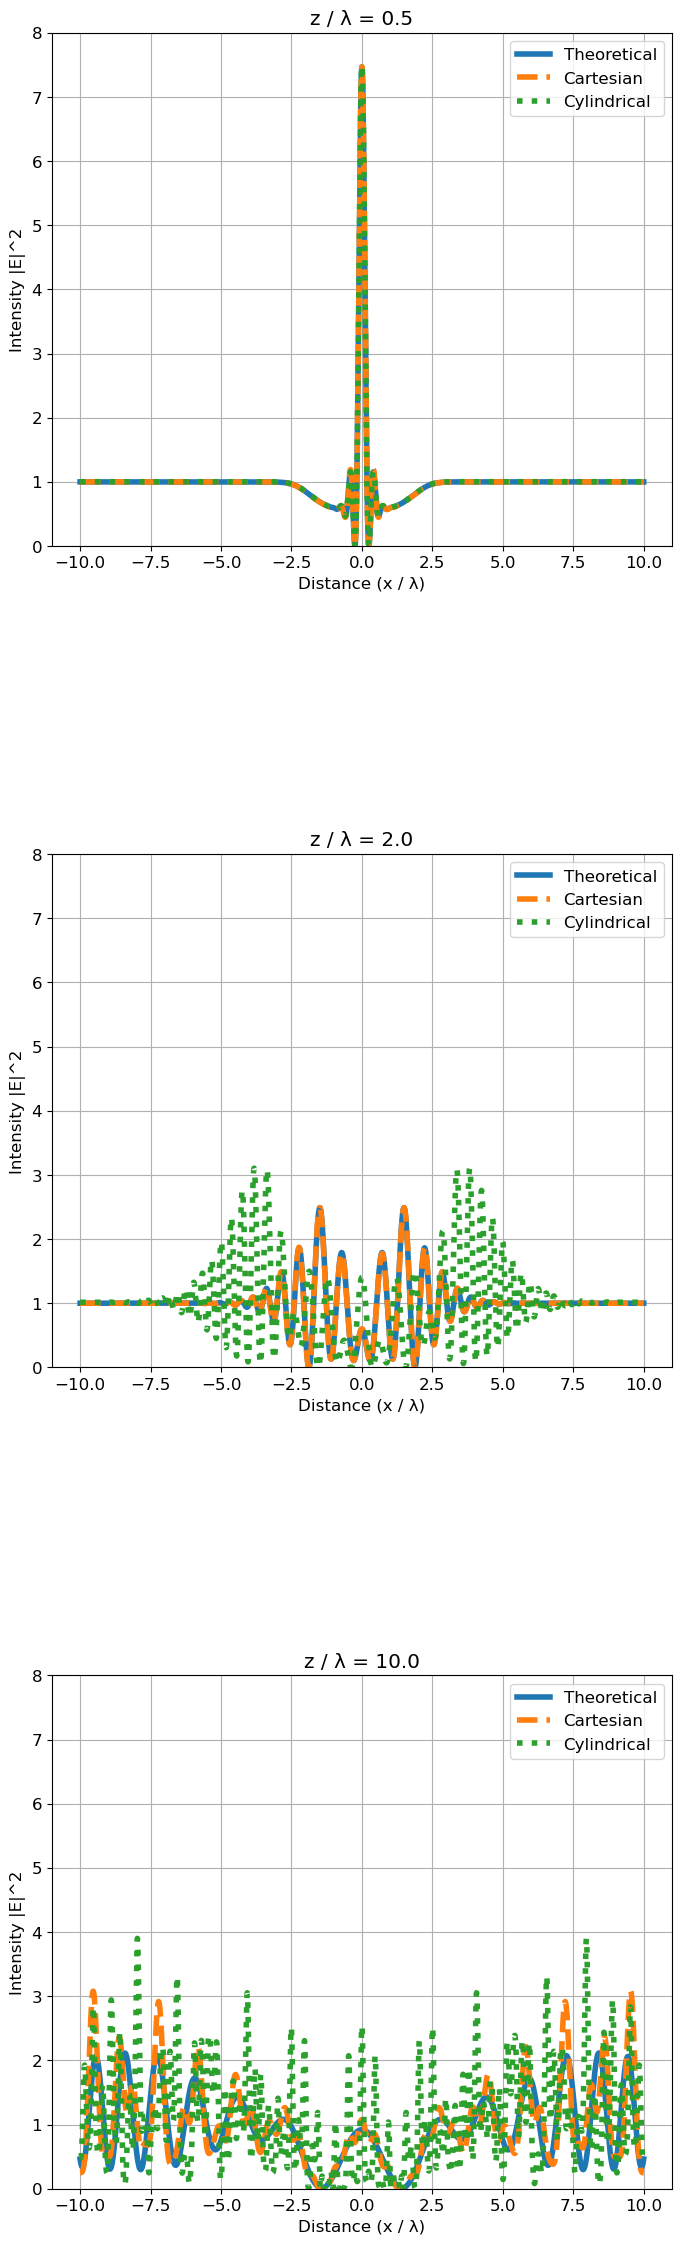

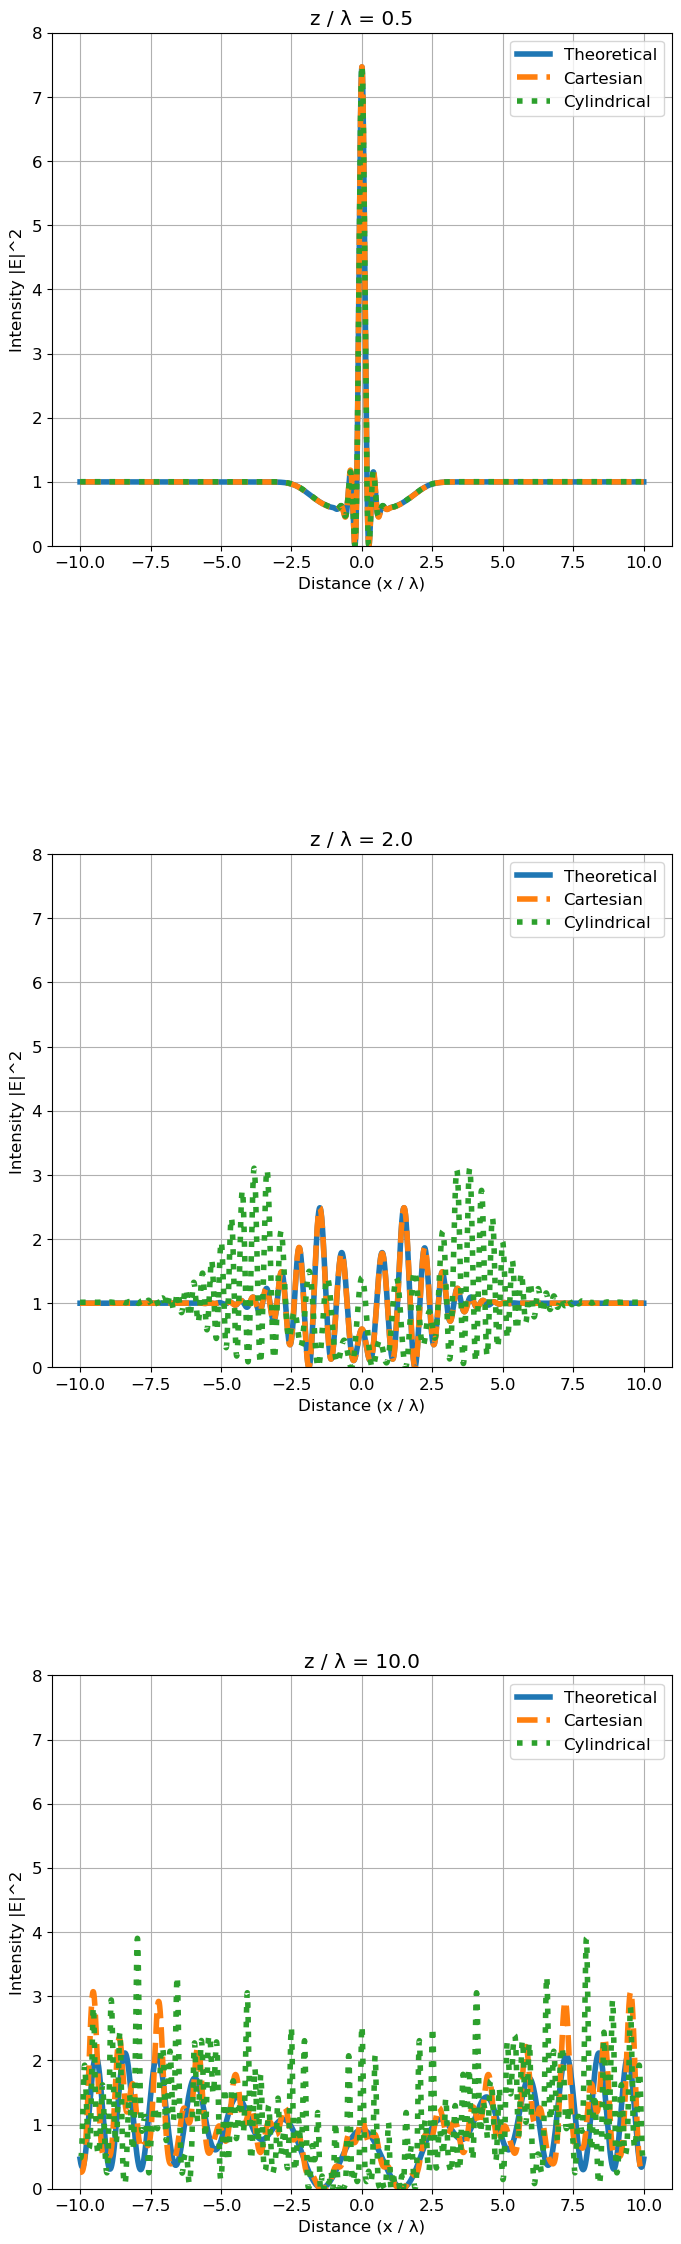

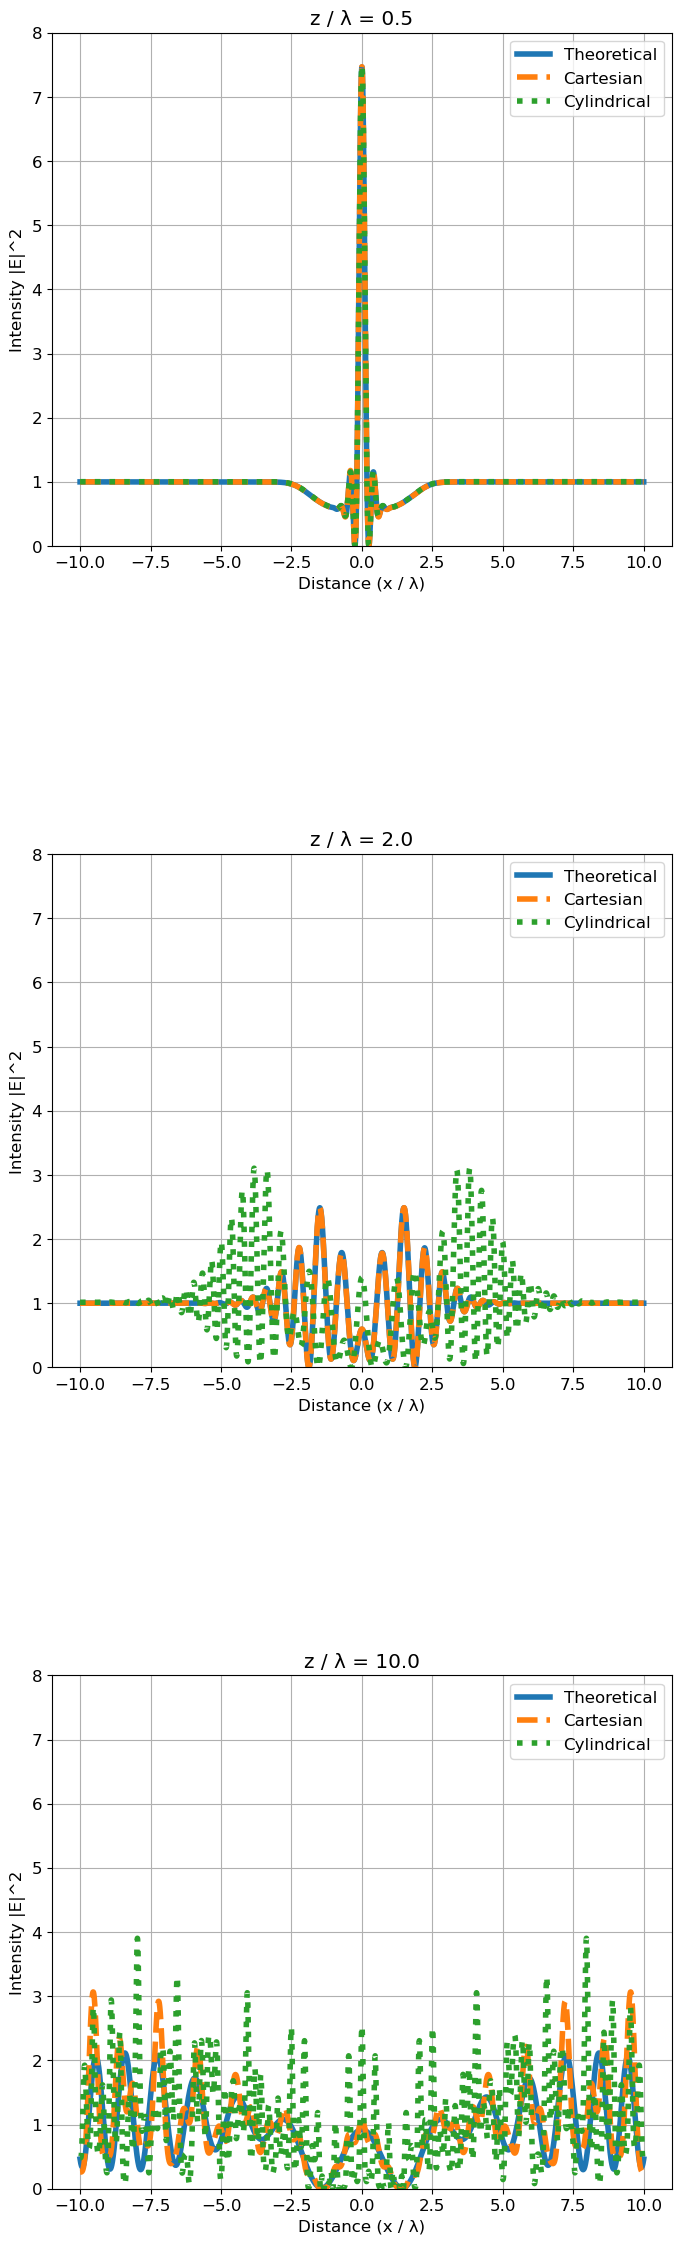

In [5]:
# Create phase screens and plots
for grid_size in grid_sizes:
    phase_screen_dec = ps.PhaseScreenDec(k, phi0, r0, grid_size, L, z_values)
    e_theoretical = ps.E_theoretical(k, phi0, r0, grid_size, L, z_values)
    phase_screen_cyl = ps.PhaseScreenCyl(k, phi0, r0, grid_size, R, Grid_theta, r, dr_values)
    results_plot = PlotResults(phase_screen_dec, e_theoretical, phase_screen_cyl)
    results_plot.plot_results(wavelength,z_divide_lambda)


In [6]:
checking_dec = ps.CheckingCriterions(phase_screen_dec.phi, phase_screen_dec.dx)
checking_dec.check_the_nyquist_criterion()
checking_dec.condition_for_minimizing_edge_effects(z_values, k, L)

Nyquist criterion is satisfied.
Edge effects are minimized
Edge effects are minimized
Edge effects are minimized


In [7]:
checking_cyl = ps.CheckingCriterions(phase_screen_cyl.phi, phase_screen_cyl.dtheta)
checking_cyl.check_the_nyquist_criterion()
checking_dec.condition_for_minimizing_edge_effects(dr_values, k, Grid_theta*R)

Nyquist criterion is satisfied.
Edge effects are minimized
Edge effects are minimized
Edge effects are minimized


In [8]:
class PlotErrors:
    
    def __init__(self, phase_screen_dec, e_theoretical, phase_screen_cyl):
        self.phase_screen_dec = phase_screen_dec
        self.e_theoretical = e_theoretical
        self.phase_screen_cyl = phase_screen_cyl
        
    
   
    def plot_results(self, wavelength, z_divide_lambda, grid_sizes):
    
        numerical_results = {z: [] for z in z_divide_lambda}
        cyl_results = {z: [] for z in z_divide_lambda}
        dtheta_values = []
        dx_values = []
        
        for z_lambda in z_divide_lambda:
            for grid_size in grid_sizes:
                
                

                # Create updated Cartesian phase screen and theoretical results for the current z_divide_lambda
                updated_phase_screen_dec = ps.PhaseScreenDec(self.phase_screen_dec.k,
                                                        self.phase_screen_dec.phi0,
                                                        self.phase_screen_dec.r0,
                                                        grid_size,
                                                        self.phase_screen_dec.L,
                                                        [z_lambda*wavelength]) # Single z_divide_lambda
                
                updated_theoretical = ps.E_theoretical(self.phase_screen_dec.k,
                                                        self.phase_screen_dec.phi0,
                                                        self.phase_screen_dec.r0,
                                                        grid_size,
                                                        self.phase_screen_dec.L,
                                                        [z_lambda*wavelength])

                # Create updated Cylindrical phase screen for the current z_divide_lambda
                updated_phase_screen_cyl = ps.PhaseScreenCyl(self.phase_screen_cyl.k,
                                                        self.phase_screen_cyl.phi0,
                                                        self.phase_screen_cyl.r0,
                                                        grid_size,
                                                        self.phase_screen_cyl.R,
                                                        self.phase_screen_cyl.Grid_theta,
                                                        self.phase_screen_cyl.r,
                                                        [z_lambda*wavelength])
                
                dx_values.append(updated_phase_screen_dec.dx/wavelength)
                dtheta_values.append(updated_phase_screen_cyl.dtheta*self.phase_screen_cyl.R/wavelength)
                
                numerical_results[z_lambda].append(np.max(np.abs(np.array(updated_theoretical.calculate_E_theoretical()) - np.array(updated_phase_screen_dec.generation_of_phase_screen_dec()))))

                cyl_results[z_lambda].append(np.max(np.abs(np.array(updated_theoretical.calculate_E_theoretical()) -  np.array(updated_phase_screen_cyl.generation_of_phase_screen_cyl()))))
                
               
      
        
    
        plt.rcParams.update({'font.size': 12})
        fig, axs = plt.subplots(1, 2, figsize=(18, 10) )
        
        
        
        axs[0].set_title("Cartesian coordinates")
        for zi, num_intensity in numerical_results.items():  
            axs[0].plot(
                dx_values[:len(num_intensity)],  
                num_intensity,  
                label=f'z / λ = {zi})',
                marker='o'
            )
       
        
        axs[0].set_xlabel("dx / λ")
        axs[0].set_ylabel("Max absolute error")
        axs[0].legend()
        axs[0].grid()
        
        
    
        axs[1].set_title("Cylindrical coordinates")
        for zi, cyl_intensity in cyl_results.items():  # Доступ к значениям словаря
            axs[1].plot(
                dtheta_values[:len(cyl_intensity)],  # Ограничить длину dtheta_values для текущих данных
                cyl_intensity,  # Список ошибок для текущего z_lambda
                label=f'z / λ = {zi})',
                marker='x'
            )

        axs[1].set_xlabel(r"dθ * R / λ")
        axs[1].set_ylabel("Max absolute error")
        axs[1].legend()
        axs[1].grid()
        
        
        # plt.tight_layout()    
        plt.savefig(f"C:\\GitHub\\master_diploma\\figures\\NEWerrors_GraphsForReview.png", dpi='figure')
        plt.show()


In [9]:
z_divide_lambda =  np.concatenate((np.array([0.1, 0.3, 0.5, 2, 3]) , np.linspace(4, 10, 3)))
z_values = z_divide_lambda*wavelength
grid_sizes = np.linspace(30000, 150000, 6 ,dtype='int')

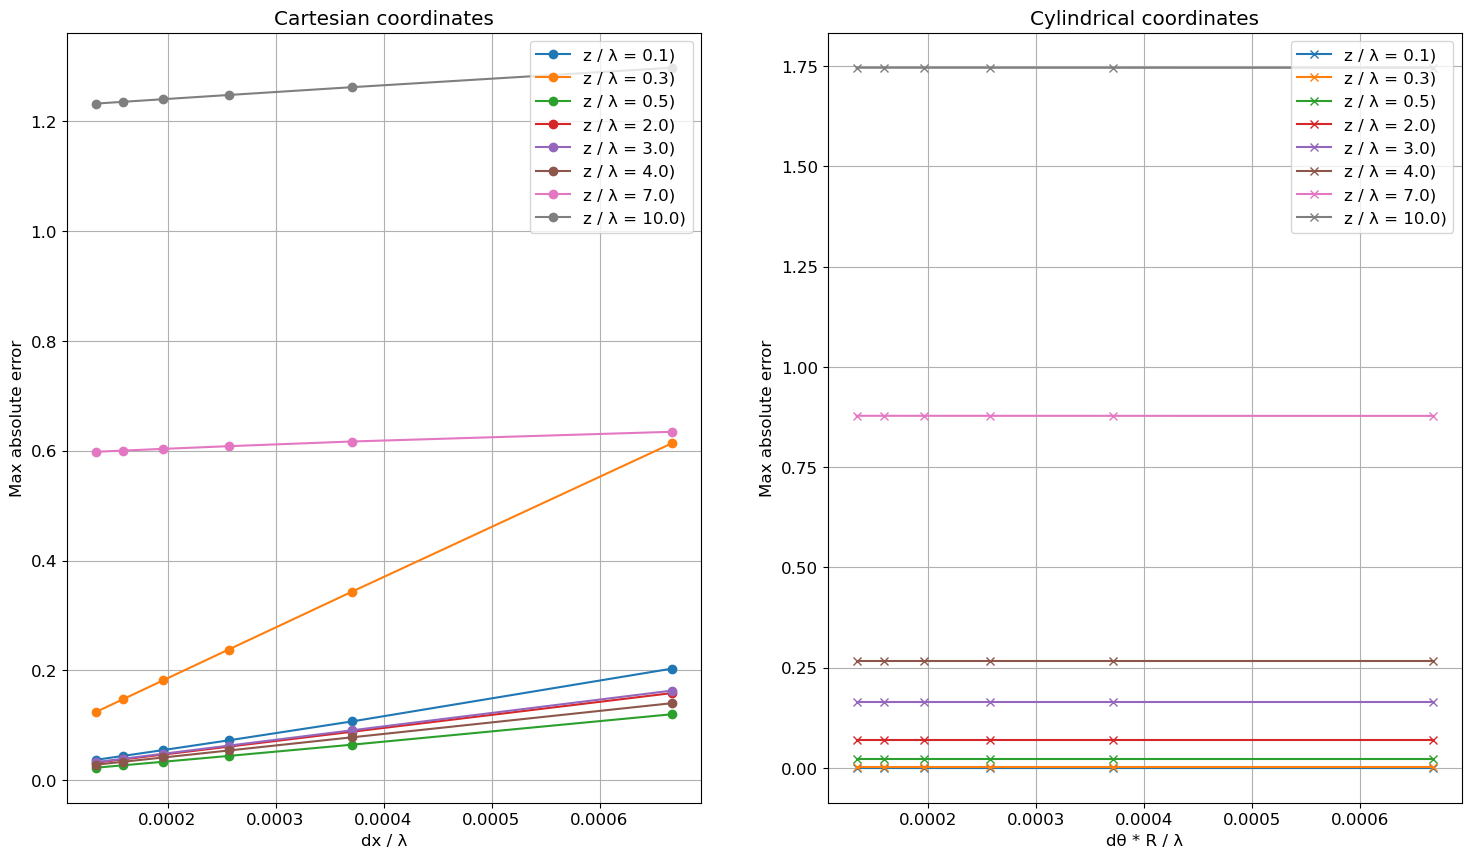

In [10]:
# Create phase screens and error plots
phase_screen_dec = ps.PhaseScreenDec(k, phi0, r0, grid_size, L, z_values)
e_theoretical = ps.E_theoretical(k, phi0, r0, grid_size, L, z_values)
phase_screen_cyl = ps.PhaseScreenCyl(k, phi0, r0, grid_size, R, Grid_theta, r, dr_values)
results_plot = PlotErrors(phase_screen_dec, e_theoretical, phase_screen_cyl)
results_plot.plot_results(wavelength,z_divide_lambda, grid_sizes)